In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib as py

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#first row from Measurments
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e593a90>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [11]:
#first row from Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e56fba8>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [12]:
my_list = session.query(Station.longitude, Station.latitude, Station.station, Station.elevation, Station.name, Station.id).all()
my_list

[(-157.8168, 21.2716, 'USC00519397', 3.0, 'WAIKIKI 717.2, HI US', 1),
 (-157.8015, 21.4234, 'USC00513117', 14.6, 'KANEOHE 838.1, HI US', 2),
 (-157.8374,
  21.5213,
  'USC00514830',
  7.0,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  3),
 (-157.9751, 21.3934, 'USC00517948', 11.9, 'PEARL CITY, HI US', 4),
 (-158.0111, 21.4992, 'USC00518838', 306.6, 'UPPER WAHIAWA 874.3, HI US', 5),
 (-157.71139,
  21.33556,
  'USC00519523',
  19.5,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  6),
 (-157.84888999999998,
  21.45167,
  'USC00519281',
  32.9,
  'WAIHEE 837.5, HI US',
  7),
 (-157.9992,
  21.3152,
  'USC00511918',
  0.9,
  'HONOLULU OBSERVATORY 702.2, HI US',
  8),
 (-157.8025, 21.3331, 'USC00516128', 152.4, 'MANOA LYON ARBO 785.2, HI US', 9)]

# Exploratory Climate Analysis

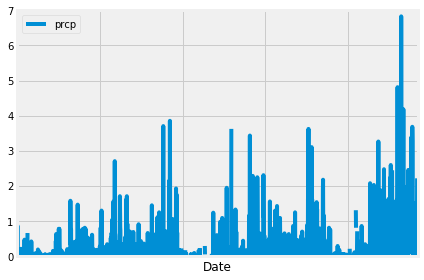

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Complete (PICKED A YEAR WITH COMPLETE DATA, HENCE 2015)
column_choice = [Measurement.date, Measurement.prcp]
precipitation_data = session.query(*column_choice).\
    filter(func.strftime('%Y', Measurement.date) == '2015')
df_precip = pd.DataFrame(precipitation_data)
last_date = list(df_precip['date'])[-1]

# Calculate the date 1 year ago from the last data point in the database
#Complete
time_one_year_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

#Complete
ax = df_precip.plot()
ax.tick_params(labelbottom=False)
ax.set_ylim(0, 7)
ax.set_xlabel("Date")
plt.tight_layout()


![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#Complete
df_precip['prcp'].describe()


count    2175.000000
mean        0.199200
std         0.484478
min         0.000000
25%         0.000000
50%         0.020000
75%         0.160000
max         6.830000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
#Complete
session_query = session.query(Station)
engine.execute('SELECT COUNT(station.Station) FROM Station').fetchall()

[(9,)]

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#Complete
session_query = session.query(Measurement.station, Measurement.id).\
                filter(func.strftime('%Y', Measurement.date) == '2015')
df = pd.DataFrame(session_query)
df.groupby('station').count().sort_values('id', ascending = False)


,id
station,
USC00519281,364
USC00519397,364
USC00519523,342
USC00516128,341
USC00513117,336
USC00514830,294
USC00511918,190
USC00517948,168
USC00518838,21


In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session_query_2 = session.query(Measurement.station, Measurement.id, Measurement.tobs).all()
df_2 = pd.DataFrame(session_query_2)
max_value = df_2['tobs'].max()
min_value = df_2['tobs'].min()
avg_output = df_2.groupby('station')['tobs'].mean()
avg_most_active = (avg_output.loc[['USC00519281']])
type(avg_most_active)
#complete
#PRINTED STRANGE, but all the information is here. 
print(max_value, min_value, avg_most_active)

87.0 53.0 station
USC00519281    71.663781
Name: tobs, dtype: float64


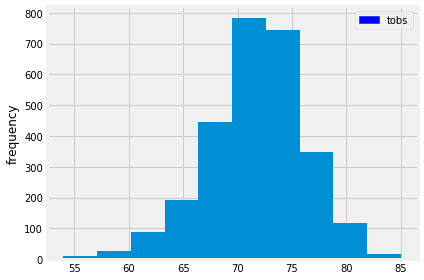

In [18]:
# Chooste the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# filtering the station with the highest activity
values_USC00519281 = df_2['station'] == 'USC00519281'
values_USC00519281

#getting the colums we need for the plot
year_values = df_2[values_USC00519281] 
year_values

#spent a solid 2 hours on this
my_plot = plt.hist(year_values['tobs'])
red_patch = mpatches.Patch(color='blue', label='tobs')
plt.legend(handles=[red_patch])
plt.ylabel('frequency')
plt.tight_layout()




![precipitation](Images/station-histogram.png)

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#complete
bar_data= calc_temps('2015-01-01', '2015-12-31')
bar_data

[(56.0, 73.8603305785124, 86.0)]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


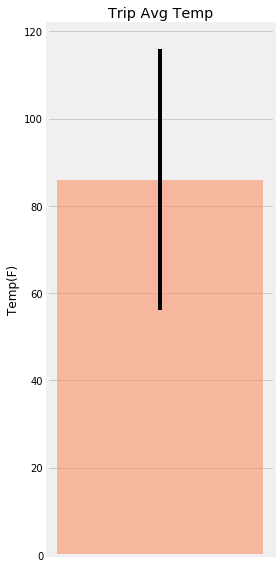

In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


#cant set xaxis to a single value
#cant add black line
#cant alter the ylabel range
#cant get the black line to show up


fig, ax = plt.subplots(figsize=plt.figaspect(2.))

min_val = 56
avg_val = 73.8603305785124
max_val = 86.0

xpos = 1
y_error = max_val - min_val

my_bar = plt.bar(xpos, max_val, yerr = y_error, alpha=0.5, align="center", color = "coral")
ax.set(xticks=range(xpos), title=('Trip Avg Temp'), ylabel='Temp(F)')

fig.tight_layout()
fig.show() 

## Optional Challenge Assignment

In [22]:
#no
#no
#no
#no
#no
#no
#no
#no
#no
#no
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
